# Reduced Load

## June

status: optimal
Minimized Cost: $ 5472770.473864187


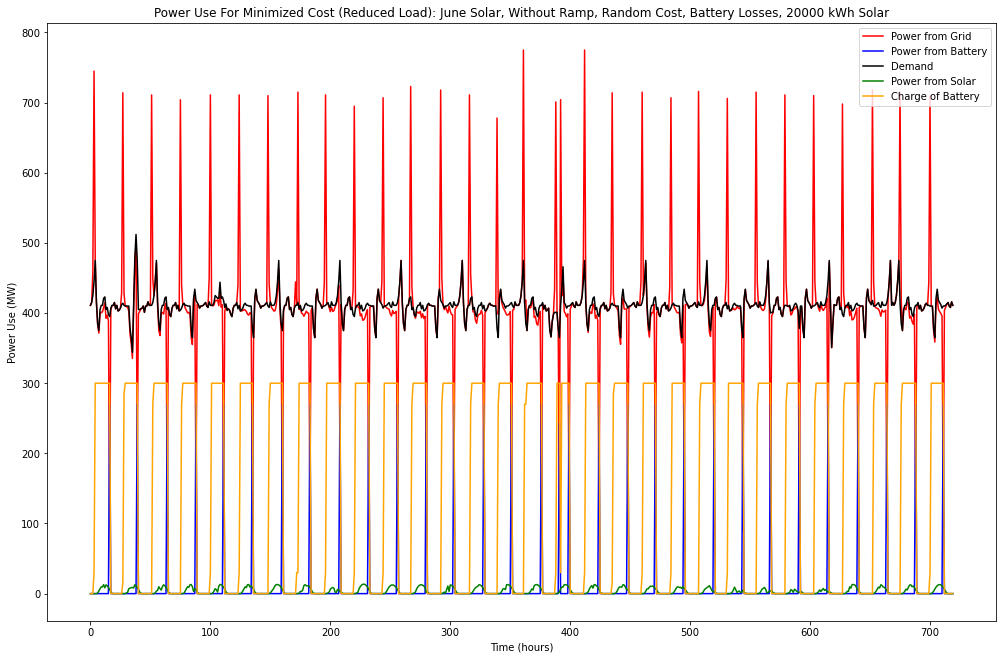

In [1]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 14.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = 300
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g) and battery (P_ch, P_dis)
P_g = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) 
C_1 = []
C_b = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g[n])]
# fixed price: C_1 = C_1 + [80*P_g[n]]
#    C_b = C_b + [(df.at[n, "Cost"])*P_b[n]]
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='j')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

# setting up equation to minimize
objective = sum(C_1)

# establishing constraints
constraints = []
constraints += [P_g >= 0] # power draw is not negative 
constraints += [P_L == P_g + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost (Reduced Load): June Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(17, 11)

## December

status: optimal
Minimized Cost: $ 5975101.183490522


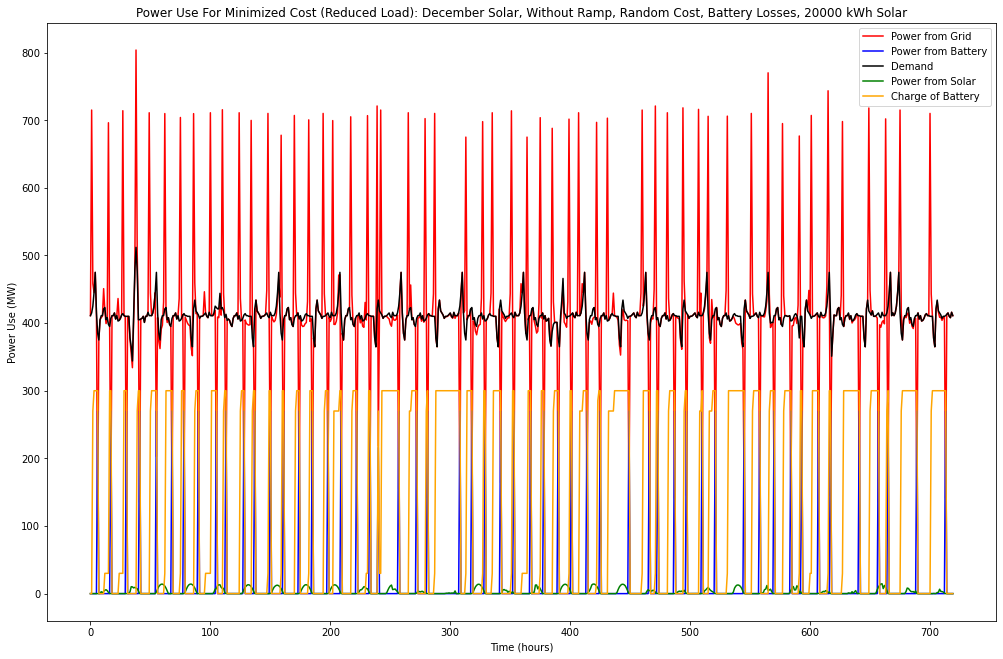

In [2]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 14.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = 300
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g) and battery (P_ch, P_dis)
P_g = cp.Variable(t)
P_ch = cp.Variable(t)
P_dis = cp.Variable(t)
#P_b = cp.Variable(t)

# defining cost of power from grid (C_1) 
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Dec')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g[n])]
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='d')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]

# setting up equation to minimize
objective = sum(C_1)

# establishing constraints
constraints = []
constraints += [P_g >= 0] # power draw is not negative 
constraints += [P_L == P_g + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Minimized Cost: $", prob.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost (Reduced Load): December Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(17, 11)

# Battery Cost: June

## $135118/MW (for 0.099 kW)

status: optimal
Battery Capacity [MW]:  9.996868523343194e-05
Minimized Cost: $ 5781889.040059365
Cost of Battery [$]:  0.08158127238885993


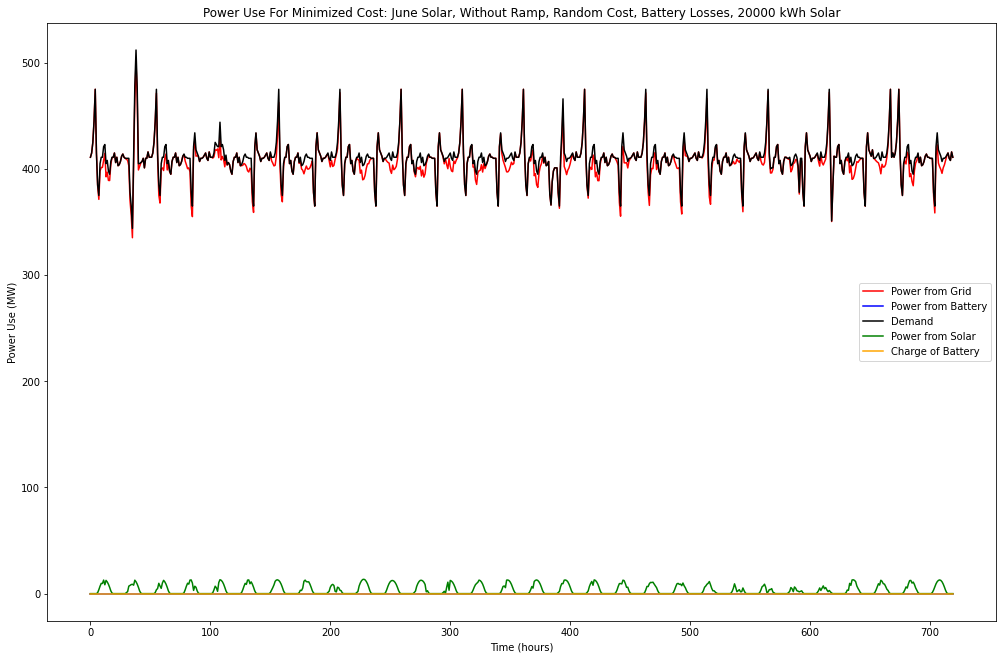

In [3]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 14.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = cp.Variable()
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g) and battery (P_ch, P_dis)
P_g = cp.Variable(t)
P_ch = cp.Variable(t) # charge
P_dis = cp.Variable(t) # discharge

# defining cost of power from grid (C_1)
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g[n])] 
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='j')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]
    
# defining battery cost
i = 0.04/12 # interest rate per month
m = 20*12 # payback period (months)
C_b_1 = 135118*E_max #cost of battery, assume tax included and maintenance included
fv = C_b_1*((1+i)**m) #future value calculation
C_b = fv*(i/(((1+i)**m) - 1))*(1/(1+i)) # monthly payment

# setting up equation to minimize
objective = sum(C_1) + C_b

# establishing constraints
constraints = []
constraints += [P_g >= 0] # power draw is not negative 
constraints += [P_L == P_g + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max/4 >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max/4 >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Battery Capacity [MW]: ", E_max.value)
print("Minimized Cost: $", prob.value)
print("Cost of Battery [$]: ", C_b.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(17, 11)

## $14800/MW

status: optimal
Battery Capacity [MW]:  5567.759439668368
Minimized Cost: $ 3949627.0831077145
Cost of Battery [$]:  497686.04592269077


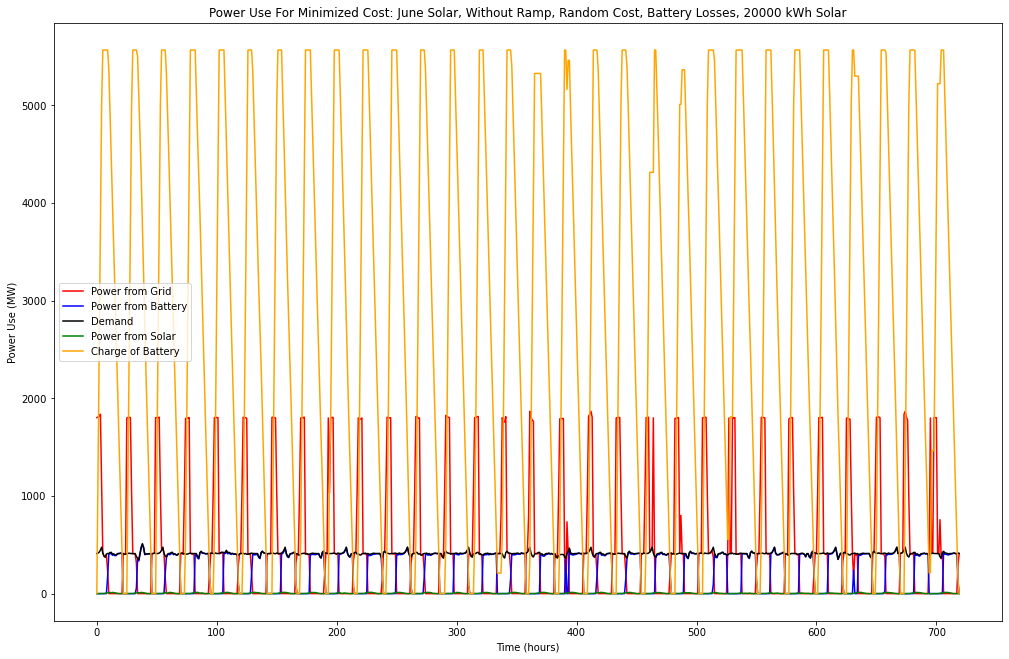

In [4]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 14.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = cp.Variable()
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g) and battery (P_ch, P_dis)
P_g = cp.Variable(t)
P_ch = cp.Variable(t) # charge
P_dis = cp.Variable(t) # discharge

# defining cost of power from grid (C_1) 
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g[n])]
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='j')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]
    
# defining battery cost
i = 0.04/12 # interest rate per month
m = 20*12 # payback period (months)
C_b_1 = 14800*E_max #cost of battery, assume tax included and maintenance included
fv = C_b_1*((1+i)**m) #future value calculation
C_b = fv*(i/(((1+i)**m) - 1))*(1/(1+i)) # monthly payment

# setting up equation to minimize
objective = sum(C_1) + C_b

# establishing constraints
constraints = []
constraints += [P_g >= 0] # power draw is not negative 
constraints += [P_L == P_g + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max/4 >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max/4 >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Battery Capacity [MW]: ", E_max.value)
print("Minimized Cost: $", prob.value)
print("Cost of Battery [$]: ", C_b.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(17, 11)

## $14800 with reduced grid cost (0.1x the current values)

status: optimal
Battery Capacity [MW]:  5.250189419799992e-06
Minimized Cost: $ 578188.9040227302
Cost of Battery [$]:  0.0004692993727546962


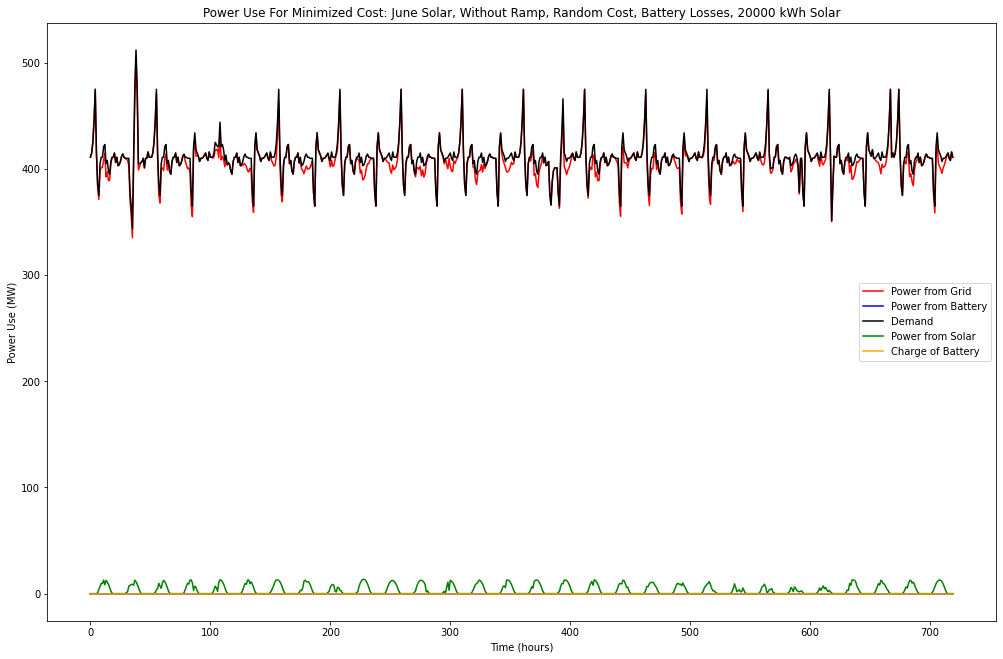

In [5]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 14.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = cp.Variable()
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g) and battery (P_ch, P_dis)
P_g = cp.Variable(t)
P_ch = cp.Variable(t) # charge
P_dis = cp.Variable(t) # discharge

# defining cost of power from grid (C_1) 
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Jun')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g[n])*0.1] 
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='j')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]
    
# defining battery cost
i = 0.04/12 # interest rate per month
m = 20*12 # payback period (months)
C_b_1 = 14800*E_max #cost of battery, assume tax included and maintenance included
fv = C_b_1*((1+i)**m) #future value calculation
C_b = fv*(i/(((1+i)**m) - 1))*(1/(1+i)) # monthly payment

# setting up equation to minimize
objective = sum(C_1) + C_b

# establishing constraints
constraints = []
constraints += [P_g >= 0] # power draw is not negative 
constraints += [P_L == P_g + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max/4 >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max/4 >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Battery Capacity [MW]: ", E_max.value)
print("Minimized Cost: $", prob.value)
print("Cost of Battery [$]: ", C_b.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: June Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(17, 11)

# Battery Cost: December

## $65785/MW (for 0.099 kW)

status: optimal
Battery Capacity [MW]:  9.978399854265528e-05
Minimized Cost: $ 6187251.3966924865
Cost of Battery [$]:  0.03964615439553457


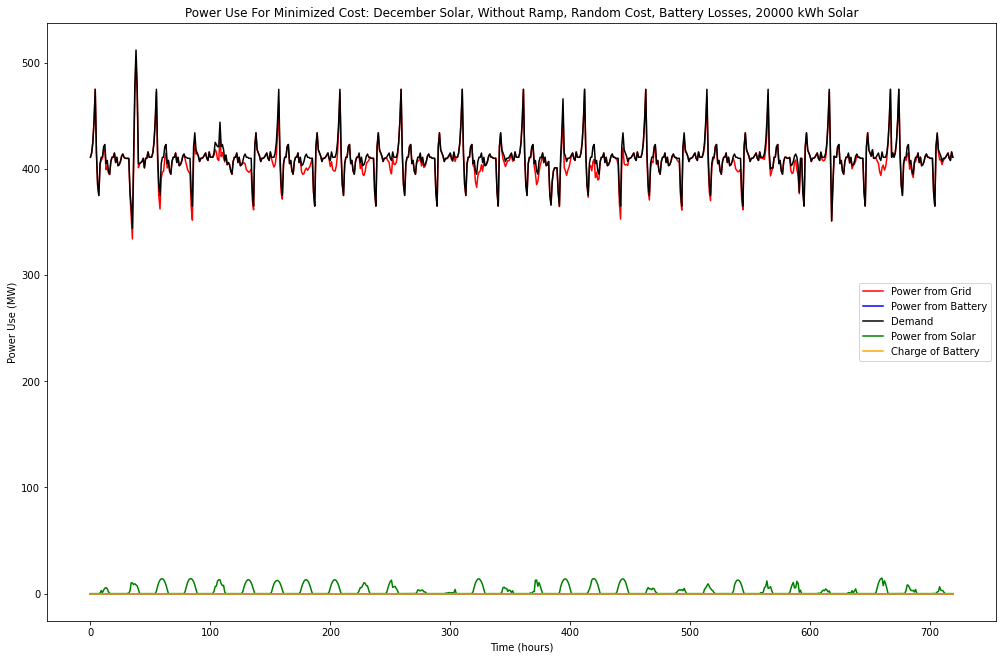

In [6]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 14.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = cp.Variable()
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g) and battery (P_ch, P_dis)
P_g = cp.Variable(t)
P_ch = cp.Variable(t) # charge
P_dis = cp.Variable(t) # discharge

# defining cost of power from grid (C_1)
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Dec')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g[n])] 
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='d')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]
    
# defining battery cost
i = 0.04/12 # interest rate per month
m = 20*12 # payback period (months)
C_b_1 = 65785*E_max #cost of battery, assume tax included and maintenance included
fv = C_b_1*((1+i)**m) #future value calculation
C_b = fv*(i/(((1+i)**m) - 1))*(1/(1+i)) # monthly payment

# setting up equation to minimize
objective = sum(C_1) + C_b

# establishing constraints
constraints = []
constraints += [P_g >= 0] # power draw is not negative 
constraints += [P_L == P_g + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max/4 >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max/4 >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Battery Capacity [MW]: ", E_max.value)
print("Minimized Cost: $", prob.value)
print("Cost of Battery [$]: ", C_b.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(17, 11)

## $14800 

status: optimal
Battery Capacity [MW]:  2560.20395704973
Minimized Cost: $ 5660024.024207713
Cost of Battery [$]:  228849.2881106947


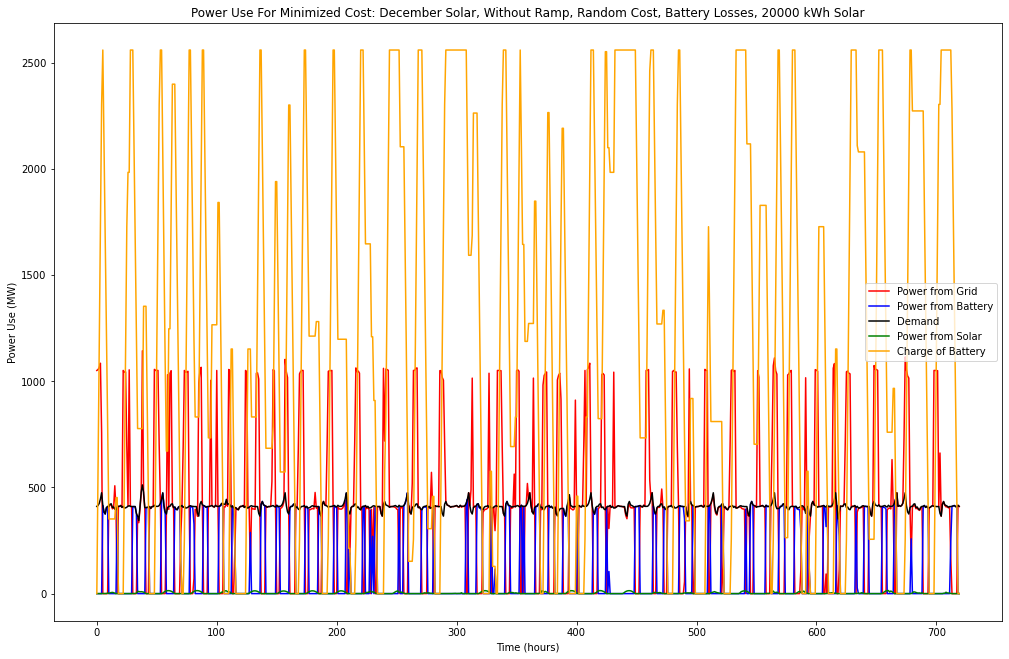

In [7]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 14.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = cp.Variable()
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g) and battery (P_ch, P_dis)
P_g = cp.Variable(t)
P_ch = cp.Variable(t) # charge
P_dis = cp.Variable(t) # discharge

# defining cost of power from grid (C_1)
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Dec')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g[n])] 
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='d')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]
    
# defining battery cost
i = 0.04/12 # interest rate per month
m = 20*12 # payback period (months)
C_b_1 = 14800*E_max #cost of battery, assume tax included and maintenance included
fv = C_b_1*((1+i)**m) #future value calculation
C_b = fv*(i/(((1+i)**m) - 1))*(1/(1+i)) # monthly payment

# setting up equation to minimize
objective = sum(C_1) + C_b

# establishing constraints
constraints = []
constraints += [P_g >= 0] # power draw is not negative 
constraints += [P_L == P_g + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max/4 >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max/4 >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Battery Capacity [MW]: ", E_max.value)
print("Minimized Cost: $", prob.value)
print("Cost of Battery [$]: ", C_b.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(17, 11)

## $14800 with reduced grid cost (0.22x the current values)

status: optimal
Battery Capacity [MW]:  5.532050792467243e-06
Minimized Cost: $ 1361195.3072134717
Cost of Battery [$]:  0.0004944941523749632


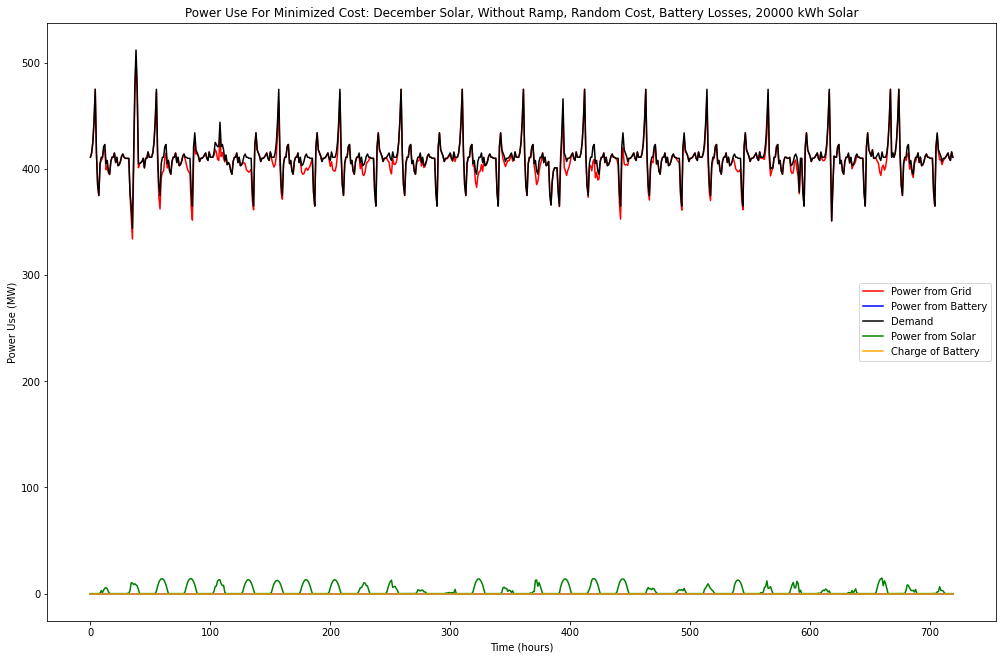

In [8]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 14.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L']]
    
# establishing battery capacity (MW) and efficiency
E_max = cp.Variable()
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g) and battery (P_ch, P_dis)
P_g = cp.Variable(t)
P_ch = cp.Variable(t) # charge
P_dis = cp.Variable(t) # discharge

# defining cost of power from grid (C_1)
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Dec')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g[n])*0.22] 
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='d')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]
    
# defining battery cost
i = 0.04/12 # interest rate per month
m = 20*12 # payback period (months)
C_b_1 = 14800*E_max #cost of battery, assume tax included and maintenance included
fv = C_b_1*((1+i)**m) #future value calculation
C_b = fv*(i/(((1+i)**m) - 1))*(1/(1+i)) # monthly payment

# setting up equation to minimize
objective = sum(C_1) + C_b

# establishing constraints
constraints = []
constraints += [P_g >= 0] # power draw is not negative 
constraints += [P_L == P_g + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max/4 >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max/4 >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Battery Capacity [MW]: ", E_max.value)
print("Minimized Cost: $", prob.value)
print("Cost of Battery [$]: ", C_b.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Random Cost, Battery Losses, 20000 kWh Solar")
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(17, 11)

status: optimal
Battery Capacity [MW]:  9.862468825065387e-06
Minimized Cost: $ 6193585.180455348
Cost of Battery [$]:  0.008517947653191174


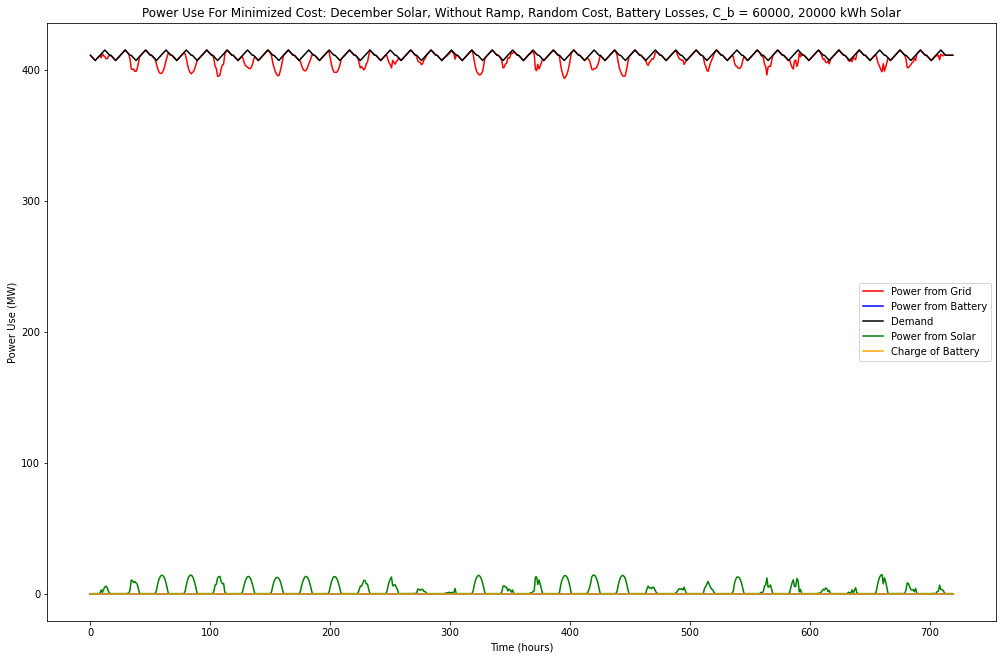

In [20]:
import pandas as pd
import cvxpy as cp
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# establishing time length (hours)
t = 720 # one month

# establishing load values
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\ethylene 14.xlsx')
P_L = []
for n in range (0, t):
    P_L = P_L + [df.at[n, 'P_L_s']]
    
# establishing battery capacity (MW) and efficiency
E_max = cp.Variable()
eff = 0.9

# defining battery charge variable
E_b = cp.Variable(t+1)

# defining power draw variables of grid (P_g) and battery (P_ch, P_dis)
P_g = cp.Variable(t)
P_ch = cp.Variable(t) # charge
P_dis = cp.Variable(t) # discharge

# defining cost of power from grid (C_1)
C_1 = []
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\houston pricing.xlsx', sheet_name='Dec')
for n in range (0, t):
    C_1 = C_1 + [df.at[n, "Settlement Point Price"]*(P_g[n])] 
    
# adding in solar
df = pd.read_excel (r'C:\Users\kenda\OneDrive - UCB-O365\Documents\research\pvwatts_hourly_Houston_20000kwh.xlsx', sheet_name='d')
P_s = []
for n in range (0, t):
    P_s = P_s + [df.at[n, "ACMW"]]
    
# defining battery cost
i = 0.04/12 # interest rate per month
m = 20*12 # payback period (months)
C_b_1 = 143000*E_max #cost of battery, assume tax included and maintenance included
fv = C_b_1*((1+i)**m) #future value calculation
C_b = fv*(i/(((1+i)**m) - 1))*(1/(1+i)) # monthly payment

# setting up equation to minimize
objective = sum(C_1) + C_b

# establishing constraints
constraints = []
constraints += [P_g >= 0] # power draw is not negative 
constraints += [P_L == P_g + P_dis + -P_ch + P_s] # the sources sum to load requirements
constraints += [E_b[0] == 0] # battery charge at start is zero
constraints += [P_ch >= 0] # charge into the is not negative
constraints += [1 >= eff] #efficiency cannot be greater than one
constraints += [P_dis >= 0] # discharge from battery is not negative
for n in range (0, t):
    constraints += [E_max/4 >= P_ch[n]] # battery charge in one time step cannot be greater than the battery capacity
    constraints += [E_max/4 >= P_dis[n]] # battery discharge in one time step cannot be greater than the battery capaticy
for n in range (1, t+1):
    constraints += [E_b[n] == E_b[n-1] + eff*P_ch[n-1] - 1/eff*P_dis[n-1]] 
    # battery effectiveness impacts charge/discharge amounts of battery
for n in range (0, t+1):
    constraints += [E_b[n] >= 0] # battery charge is not negative
    constraints += [E_max >= E_b[n]] # battery charge cannot be greater than the capacity
    
#solving problem
prob = cp.Problem(cp.Minimize(objective), constraints)
prob.solve() 

#printing results
print("status:", prob.status)
print("Battery Capacity [MW]: ", E_max.value)
print("Minimized Cost: $", prob.value)
print("Cost of Battery [$]: ", C_b.value)

# battery charge variable for plotting
E_plot = []
for n in range (0, t):
    E_plot = E_plot + [E_b.value[n]]
    
#plotting the results  
plt.plot(range(0,t), P_g.value, "red", label = 'Power from Grid') 
plt.plot(range(0,t), P_dis.value, "blue", label = 'Power from Battery')
plt.plot(range(0,t), P_L, "black", label = 'Demand')
plt.plot(range(0,t), P_s, "green", label = 'Power from Solar') 
plt.plot(range(0,t), E_plot, "orange", label = 'Charge of Battery')
plt.xlabel("Time (hours)")
plt.ylabel("Power Use (MW)")
plt.title("Power Use For Minimized Cost: December Solar, Without Ramp, Random Cost, Battery Losses, C_b = 60000, 20000 kWh Solar")
leg = plt.legend()
fig = plt.gcf()
fig.set_size_inches(17, 11)